In [64]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv('test.csv')

In [66]:
train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
full_df=pd.concat([train_df, test_df], ignore_index=True)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [68]:
train_df.info()
test_df.info()
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [69]:
SubCol1=train_df.PassengerId.tolist()

In [70]:
train_df=pd.DataFrame()
test_df=pd.DataFrame()

In [71]:
def extract_df():
    tr_df=full_df.loc[full_df['Survived'].notnull()]
    te_df=full_df.loc[full_df['Survived'].isnull()]
    return tr_df, te_df
    
train_df, test_df = extract_df()

In [72]:
full_df.Name
# 호칭 추출 : 공백문자+알파벳문자1개이상+.

title_sr=full_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False) # expand=True DF로 나옴 // False면 Seires가 됨
full_df['Title']=title_sr
pd.crosstab(full_df['Title'], full_df['Sex'])
title_sr.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Mlle          2
Major         2
Sir           1
Lady          1
Mme           1
Capt          1
Dona          1
Countess      1
Jonkheer      1
Don           1
Name: Name, dtype: int64

In [73]:
# 호칭 단순화
title_list=set(title_sr)
map_title_dict={'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'}
working_dic={}
for key in ['Lady', 'Countess', 'Capt', 'Col', 'Don', "Major", 'Rev', 'Sir', 'Jonkheer', 'Dona']:
    working_dic[key]='Rare'

In [74]:
map_title_dict.update(working_dic)

In [75]:
map_title_dict # 호칭을 매핑하기 위한 규칙 정의 딕셔너리
full_df['Title']=full_df['Title'].replace(map_title_dict)

In [76]:
set(list(full_df['Title']))

{'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rare'}

In [77]:
subCol1=test_df.PassengerId
full_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)

In [78]:
train_df, test_df=extract_df()

In [79]:
train_df
# Pclass(1,2,3) 생존자(Survived) 평균
print(train_df.loc[train_df['Pclass']==1].Survived.mean())
print(train_df.loc[train_df['Pclass']==2].Survived.mean())
print(train_df.loc[train_df['Pclass']==3].Survived.mean())

train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

0.6296296296296297
0.47282608695652173
0.24236252545824846


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [80]:
feature_list=list(full_df)
for f in feature_list:
    print(f+" "+str(len(full_df[f].value_counts())))

Age 98
Embarked 3
Fare 281
Parch 8
Pclass 3
Sex 2
SibSp 7
Survived 2
Title 6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192EA2E15C8>,
      dtype=object)

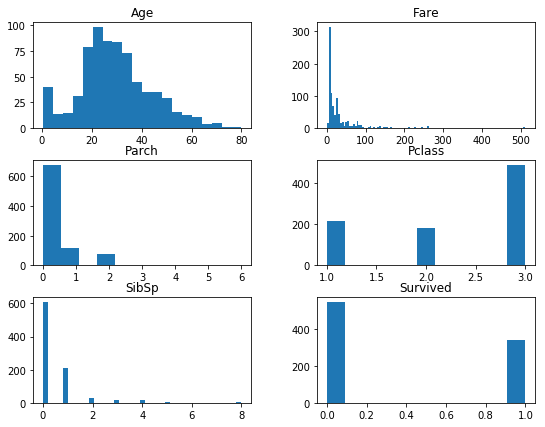

In [81]:
train_df.hist(figsize=(9,7), grid=False, bins='auto')

In [82]:
train_df.isnull().sum()
test_df.isnull().sum()
full_df.Embarked.value_counts()
full_df.Embarked.fillna('S', inplace=True)

In [83]:
full_df['Fare'].median()
full_df['Fare'].fillna(test_df.Fare.median(), inplace=True)

In [84]:
train_df, test_df = extract_df()

In [85]:
full_df['Sex']=full_df['Sex'].map({'female':0,'male':1})

In [86]:
def onehot(df, feature_list): # 원핫 인코딩
    df=pd.get_dummies(df, columns=feature_list)
    return df

onehot_list=['Title','Pclass','Embarked']
full_df=onehot(full_df, onehot_list)

In [87]:
full_df

,Age,Fare,Parch,Sex,SibSp,Survived,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,1,0.0,0,0,0,1,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,0,1,1.0,0,0,0,0,1,0,1,0,0,1,0,0
2,26.0,7.9250,0,0,0,1.0,0,0,1,0,0,0,0,0,1,0,0,1
3,35.0,53.1000,0,0,1,1.0,0,0,0,0,1,0,1,0,0,0,0,1
4,35.0,8.0500,0,1,0,0.0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1305,39.0,108.9000,0,0,0,NaN,0,0,0,0,0,1,1,0,0,1,0,0
1306,38.5,7.2500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1307,NaN,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1


In [88]:
train_df, test_df = extract_df()

In [91]:
x_train_age=full_df[[x for x in list(train_df) if not x in ['Survived']]]

In [92]:
x_predict_age=x_train_age[x_train_age.Age.isnull()]
x_predict_age.shape

(263, 17)

In [93]:
x_train_age=x_train_age[x_train_age.Age.notnull()]

In [94]:
y_train_age=x_train_age.Age

In [95]:
x_train_age.drop(['Age'], axis=1, inplace=True)

In [96]:
x_predict_age.drop(['Age'], axis=1, inplace=True)

In [97]:
# MLP 기반 나이 예측 및 나이 결측값 대체

In [98]:
from sklearn import preprocessing
scaler2=preprocessing.StandardScaler().fit(x_train_age)
x_train_age=scaler2.transform(x_train_age)
x_predcit_age=scaler2.transform(x_predict_age)

In [99]:
x_train_age
x_predcit_age

array([[-0.5065512 , -0.50116236,  0.7678969 , ..., -0.50417918,
         4.46318272, -1.72984578],
       [-0.42498839, -0.50116236,  0.7678969 , ..., -0.50417918,
        -0.22405536,  0.57808622],
       [-0.52869961, -0.50116236, -1.30225815, ...,  1.98342186,
        -0.22405536, -1.72984578],
       ...,
       [-0.51388372, -0.50116236,  0.7678969 , ..., -0.50417918,
        -0.22405536,  0.57808622],
       [-0.51388372, -0.50116236,  0.7678969 , ..., -0.50417918,
        -0.22405536,  0.57808622],
       [-0.25692593,  0.69023725,  0.7678969 , ...,  1.98342186,
        -0.22405536, -1.72984578]])

In [102]:
Age_None_list=full_df[full_df['Age'].isnull()].index.tolist()

In [104]:
from sklearn.neural_network import MLPRegressor
mlr=MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,50))
mlr.fit(x_train_age, y_train_age)Age_None_list

SyntaxError: invalid syntax (<ipython-input-104-e4311a7a4874>, line 3)

In [172]:
mlr.score(x_train_age, y_train_age)

0.6153830394434889

In [174]:
for a,b in zip(np.array(y_train_age),mlr.predict(x_train_age)):
    print(a, " ",b)

22.0   25.16605891819697
38.0   41.955504134610635
26.0   23.449331199970047
35.0   31.28308616360421
35.0   28.26664077678407
54.0   38.931368345657255
2.0   4.8512293233764785
27.0   28.938548748619223
14.0   22.62371735489569
4.0   1.0235407644779864
58.0   33.02101583940379
20.0   28.26664077678407
39.0   39.32457531909248
14.0   23.46897634516013
55.0   36.057250319133125
2.0   7.051996539340263
31.0   31.177070459792375
35.0   31.361645382382626
34.0   32.365642425759056
15.0   23.006334179291912
28.0   44.790403373424795
8.0   7.24437510856712
38.0   39.71437037955958
19.0   19.693279264031943
40.0   50.25806101090211
66.0   32.55871878025452
28.0   40.09199834776031
42.0   36.378400650631775
21.0   28.26664077678407
18.0   17.852969307067394
14.0   16.16007296718808
40.0   33.55377480247345
27.0   30.539365178820578
3.0   2.4180557063617796
19.0   22.98964480281261
18.0   31.23282891944472
7.0   4.231013289799458
21.0   28.38509098124959
49.0   40.37379088171033
29.0   32.92393

27.0   26.583892283522474
23.0   28.491096103305473
40.0   39.34533683164725
15.0   12.664351547128696
20.0   20.81803740452264
54.0   40.897743222703255
36.0   40.7511563862716
64.0   61.50357324565509
30.0   32.365642425759056
37.0   48.293379974015735
18.0   31.28308616360421
27.0   31.854455062742314
40.0   32.133950800364495
21.0   15.526738359778815
17.0   28.352018905293626
40.0   32.365642425759056
34.0   37.31627223069038
11.5   5.235695485635737
61.0   53.598240344798754
8.0   3.196410902809463
33.0   28.35941097692148
6.0   6.899517817686946
18.0   23.49095227028801
23.0   32.55871878025452
0.33   5.675959816457613
47.0   46.9832737152753
8.0   10.398902563310381
25.0   32.55871878025452
35.0   22.975269686538418
24.0   32.55871878025452
33.0   38.433795194532294
25.0   28.339700862898404
32.0   28.62168026389885
17.0   17.79323135944278
60.0   32.92393485685384
38.0   17.302718371594057
42.0   41.91160218180688
57.0   56.97638539865879
50.0   44.4750297576287
30.0   28.5999

In [179]:
full_df['Age'][Age_None_list]=mlr.predict(x_predict_age).tolist()

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
full_df

,Age,Fare,Parch,Sex,SibSp,Survived,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,7.2500,0,1,1,0.0,0,0,0,1,0,0,0,0,1,0,0,1
1,38.000000,71.2833,0,0,1,1.0,0,0,0,0,1,0,1,0,0,1,0,0
2,26.000000,7.9250,0,0,0,1.0,0,0,1,0,0,0,0,0,1,0,0,1
3,35.000000,53.1000,0,0,1,1.0,0,0,0,0,1,0,1,0,0,0,0,1
4,35.000000,8.0500,0,1,0,0.0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,53.068650,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1305,39.000000,108.9000,0,0,0,NaN,0,0,0,0,0,1,1,0,0,1,0,0
1306,38.500000,7.2500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1307,53.068650,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1


In [181]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Age             1309 non-null float64
Fare            1309 non-null float64
Parch           1309 non-null int64
Sex             1309 non-null int64
SibSp           1309 non-null int64
Survived        891 non-null float64
Title_Dr        1309 non-null uint8
Title_Master    1309 non-null uint8
Title_Miss      1309 non-null uint8
Title_Mr        1309 non-null uint8
Title_Mrs       1309 non-null uint8
Title_Rare      1309 non-null uint8
Pclass_1        1309 non-null uint8
Pclass_2        1309 non-null uint8
Pclass_3        1309 non-null uint8
Embarked_C      1309 non-null uint8
Embarked_Q      1309 non-null uint8
Embarked_S      1309 non-null uint8
dtypes: float64(3), int64(3), uint8(12)
memory usage: 76.8 KB


In [212]:
xtrain=full_df[full_df['Survived'].notnull()]
ytrain=full_df['Survived'][full_df['Survived'].notnull()]

In [213]:
xpredict=full_df[full_df['Survived'].isnull()]

In [214]:
xtrain.drop('Survived', axis=1, inplace=True)

C:\Users\student\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [215]:
xpredict.drop('Survived', axis=1, inplace=True)

In [216]:
scaler=preprocessing.StandardScaler().fit(xtrain)
xtrain=scaler.transform(xtrain)
xpredict=scaler.transform(xpredict)

In [217]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,50))

In [218]:
clf.fit(xtrain, ytrain)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [219]:
ytrain

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [220]:
clf.score(xtrain, ytrain)

0.9023569023569024

In [221]:
subcol=clf.predict(xpredict).astype(int)

In [238]:
SubCol1=test_df.PassengerId.tolist()
sm=pd.DataFrame({'PassengerId':SubCol1,"Survived":subcol})

In [241]:
sm.to_csv("titanic_sub.csv", index=False)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [242]:
load_data(iris)

NameError: name 'load_data' is not defined

In [254]:
from sklearn.datasets import load_iris
iris=load_iris()

In [260]:
iris_data=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
iris_data['target']=iris_data['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [261]:
x_data=iris_data.iloc[:,:-1]
y_data=iris_data.iloc[:,[-1]]

In [265]:
iris_data.columns=['sepal_length','sepal_width','petal_length','petal_width','target']

In [267]:
iris=iris_data

In [268]:
iris

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
